In [1]:
import sys
sys.path.append("..")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from mlresearch.utils import set_matplotlib_style
from recgame.environments import BaseEnvironment
from recgame.recourse import NFeatureRecourse
from recgame.utils import generate_synthetic_data

In [3]:
set_matplotlib_style(16)

# Some variables to define the problem
RNG_SEED = 42
rng = np.random.default_rng(RNG_SEED)
N_CONTINUOUS = 2
N_CAT = 0
N_AGENTS = 100

# Environment variables
N_LOANS = 10  # np.array([20, 1, 10, 30, 0, 5, 50, 10, 40])
ADAPTATION = 0.01  # np.array([.2, .1, .3, .25, .1, .4, .05, .05, .2])
NEW_AGENTS = 10  # np.array([40, 10, 50, 5, 0, 100, 0, 0, 20])

df, y, categorical = generate_synthetic_data(N_AGENTS, N_CONTINUOUS, N_CAT, RNG_SEED)

lr = LogisticRegression().fit(df, y)

In [4]:
def data_source_func(n_agents):
    X, _, _ = generate_synthetic_data(
        n_agents=n_agents,
        n_continuous=N_CONTINUOUS,
        n_categorical=N_CAT,
        random_state=rng
    )
    return X

In [5]:
# Define the necessary components to run simulation
recourse = NFeatureRecourse(lr, n_features=2, categorical=categorical)
recourse.set_actions(df)
recourse.action_set_.ub = [2, 2]

environment = BaseEnvironment(
    X=df,
    recourse=recourse,
    data_source_func=data_source_func,
    threshold=N_LOANS,
    threshold_type="absolute",
    adaptation=ADAPTATION,
    behavior_function="continuous_flexible",
    growth_rate=NEW_AGENTS,
    growth_rate_type="absolute",
    random_state=RNG_SEED,
)

environment.simulate(50)

BaseEnvironment(X=         f_0       f_1
0   0.601572  0.153339
1   0.750150  0.813522
2  -0.150345  0.065940
3   0.542613  0.394586
4   0.494400  0.215652
..       ...       ...
95  1.074555  0.440160
96  0.372271  0.987148
97  0.130985  0.201758
98  0.714442  0.368465
99  0.498293  0.445519

[100 rows x 2 columns],
                adaptation=0.1,
                data_source_func=<function data_source_func at 0x7f8f63566c20>,
                growth_rate=10, growth_rate_type='absolute', random_state=42,
                recourse=NFeatureRecourse(categorical=[],
                                          model=LogisticRegression(),
                                          n_features=2,
                                          threshold=0.5945540763801748),
                threshold=10)

<Axes: title={'center': 'Population scores over 51 time steps'}, xlabel='Step', ylabel='Score'>

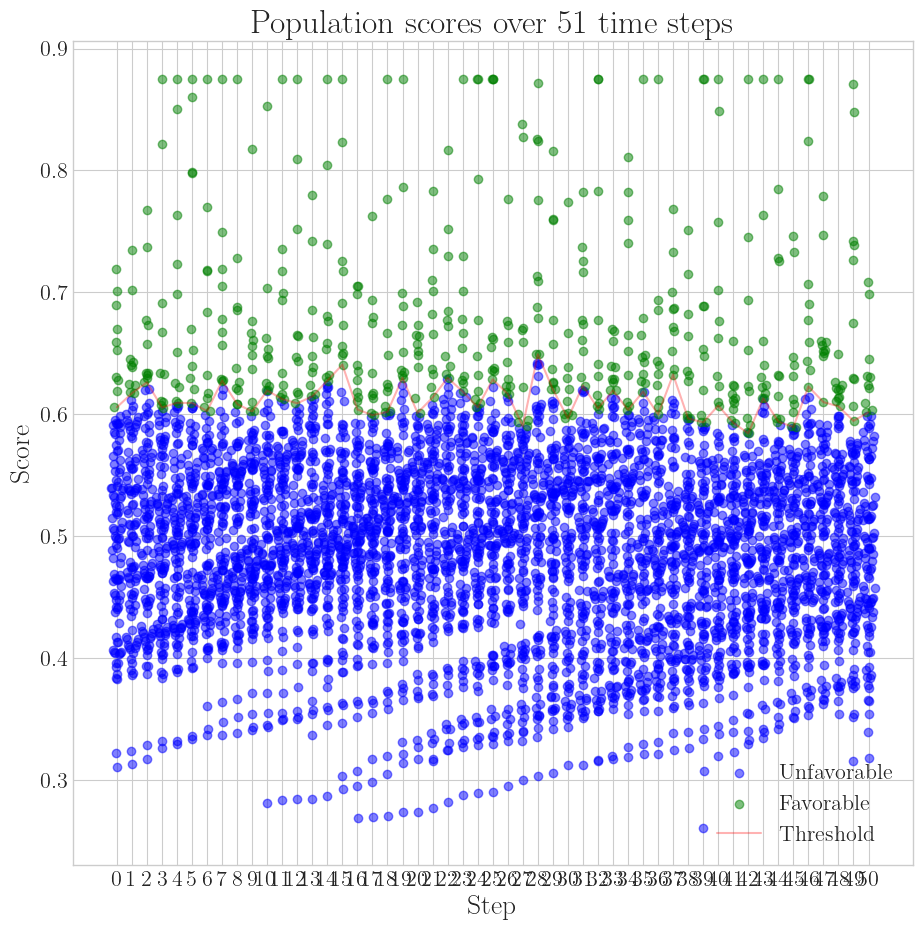

In [6]:
environment.plot.agent_scores()

<Axes: title={'center': 'Population at t=4'}, xlabel='f_0', ylabel='f_1'>

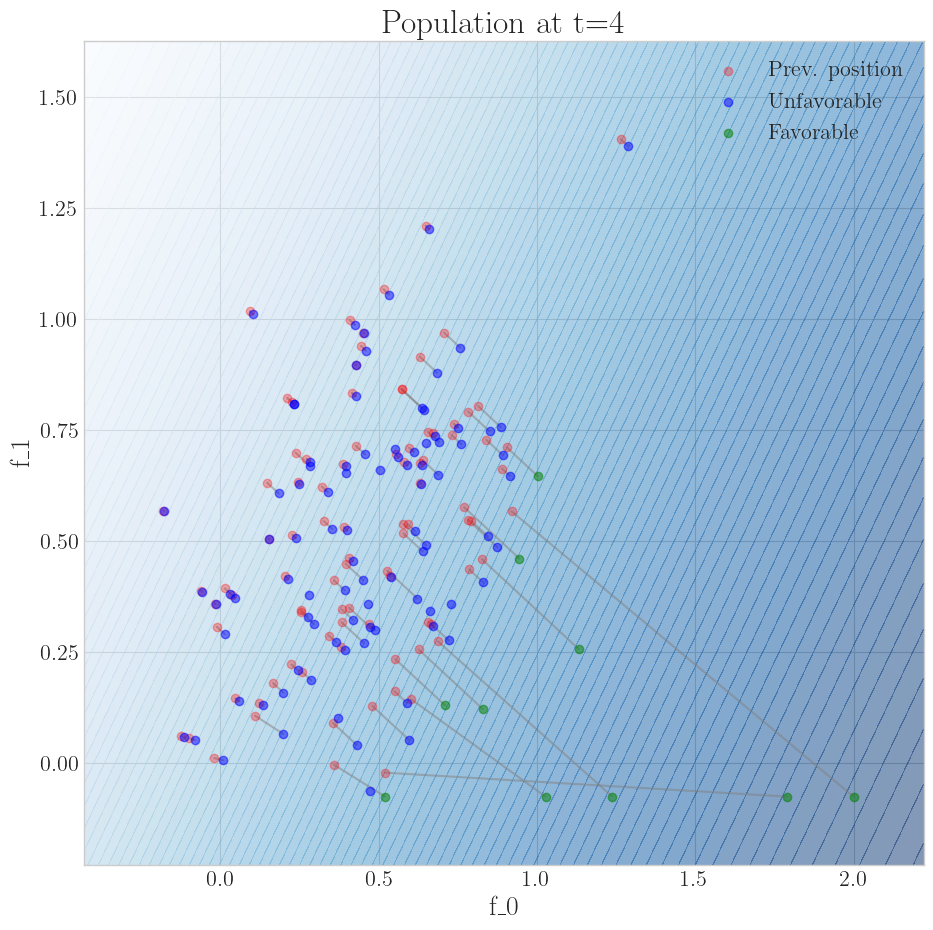

In [7]:
environment.plot.scatter(4)

,success_proba,success_rate
success_proba,1.000000,0.145234
success_rate,0.145234,1.000000


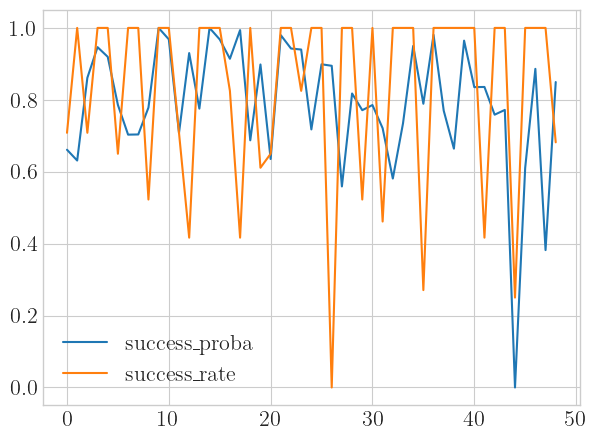

In [8]:
steps_info = environment.analysis.steps_info()
predictions = pd.concat(
    [
        steps_info.success_proba.iloc[:-1].reset_index(drop=True),
        steps_info.success_rate.iloc[1:].reset_index(drop=True)# * -1,
    ],
    axis=1,
).astype(float)
((predictions - predictions.min()) / (predictions.max() - predictions.min())).iloc[
    :50
].plot.line()
predictions.corr()

In [9]:
steps_info

,n_adapted,n_candidates,favorable_outcomes,success_rate,threshold,threshold_drift,new_agents,new_agents_proba,moving_agent_proba,success_proba
1,90.0,12.0,10.0,0.833333,0.617260,0.019048,10.0,0.09,3.378845e-03,0.951608
2,90.0,12.0,10.0,0.833333,0.626195,0.014475,10.0,0.08,5.145873e-03,0.947322
3,90.0,6.0,10.0,1.000000,0.605481,-0.033078,10.0,0.10,1.200435e-02,0.980188
4,90.0,12.0,10.0,0.833333,0.609411,0.006490,10.0,0.09,1.888722e-02,0.992359
5,90.0,7.0,10.0,1.000000,0.609191,-0.000362,10.0,0.09,1.605315e-02,0.988521
6,90.0,7.0,10.0,1.000000,0.602595,-0.010827,10.0,0.10,6.864114e-03,0.969409
7,90.0,10.0,10.0,0.800000,0.627551,0.041414,10.0,0.08,2.128679e-03,0.957603
8,90.0,4.0,10.0,1.000000,0.608327,-0.030633,10.0,0.09,2.371152e-03,0.957675
9,90.0,7.0,10.0,1.000000,0.602314,-0.009885,10.0,0.10,4.703085e-03,0.968347
10,90.0,11.0,10.0,0.727273,0.619484,0.028507,10.0,0.08,1.106261e-02,1.000000
